### 두개의 데이터 셋을 합치고 처리하기

### 데이터 참고 사이트 
* our world in data
  * https://ourworldindata.org/covid-vaccinations
* bloomberg.com
  * https://www.bloomberg.com/graphics/covid-vaccine-tracker-global-distribution/
  
* 코로나 19(COVID-19) 실시간 상황판
  * https://coronaboard.kr/

In [81]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

### 01 파일 확인 및 불러오기

In [82]:
os.listdir()

['.git',
 '.idea',
 '.ipynb_checkpoints',
 '01_dataScraping_corona01_today.ipynb',
 '01_dataScraping_corona02.py',
 '01_dataScraping_corona02_all.ipynb',
 '02_dataScraping_bloomberg.ipynb',
 '02_dataScraping_bloomberg.py',
 '03_corona_vaccine_merge.ipynb',
 '03_corona_vaccine_merge.py',
 '04_analysis_corr.ipynb',
 '05_people_request.ipynb',
 '06_corona_analysis.ipynb',
 '20210921_00_datamerge.csv',
 '20210921_00_datamerge.xlsx',
 '20210929_chrome_driver_01.ipynb',
 '2021_0911_13',
 '2021_0911_13.zip',
 '2021_0920_00',
 'chromedriver_91.exe',
 'data',
 'html_pdf',
 'project01_01',
 'README.md',
 'WEB_sel_project11_naverNews_corona_0731.ipynb']

In [83]:
path = os.getcwd() + '\\data'

In [84]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\toto\Documents\Github\corona_analysis\data\2021-08-07_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-08-07_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-19_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-19_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-20_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-20_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-28_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-28_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-29_corona.csv
C:\Users\toto\Documents\Github\corona_analysis\data\2021-09-29_corona.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\20210808_16datamerge.csv
C:\Users\toto\Documents\Github\corona_analysis\data\20210808_16datamerge.xlsx
C:\Users\toto\Documents\Github\corona_analysis\data\20210808_16_today_corona.csv
C:\Users\toto\Docum

In [85]:
import pandas as pd

# excel 데이터 셋도 pd.read_excel로 가져올 수 있음.
corona = pd.read_csv("./data/2021-09-29_corona.csv")
vaccine = pd.read_csv("./data/20210930_00_vaccine_bloomberg.csv")
country_code = pd.read_excel("./data/country.xlsx")

corona.shape, vaccine.shape, country_code.shape

((222, 15), (207, 6), (227, 4))

In [86]:
corona.head()

,국가,치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,113357.0,44055692,113357.0,711222,2103.0,33520958.0,126125.0
1,인도🇮🇳,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,4743.0,33718984,4743.0,447828,129.0,32986180.0,9420.0
2,브라질🇧🇷,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,15395.0,21381790,15395.0,595520,818.0,20383243.0,22052.0
3,영국🇬🇧,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,34520.0,7736235,34520.0,136375,167.0,6255350.0,36239.0
4,러시아🇷🇺,2.8,88.9,51305,145934462,626809.0,3117.0,2300.0,22430.0,7487138,22430.0,206388,857.0,6653941.0,18456.0


In [87]:
vaccine.head()

,국가,백신접종수,백신보유율(인구),1차접종,2차접종,일별접종수
0,Global Total,6.199444e+09,-999.0,-999.0,-999.0,29152868.0
1,Mainland China,2.203185e+09,78.7,78.6,73.0,3171286.0
2,India,8.765386e+08,32.0,46.7,16.8,7178901.0
3,EU,5.640300e+08,63.5,67.3,64.7,1052903.0
4,U.S.,3.911526e+08,61.1,64.4,55.8,701422.0


In [88]:
country_code.head()

,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


### 코로나에 별칭을 제외한 나라명 가져오기

In [89]:
corona['국가'].str.extract('([ㄱ-ㅣ가-힣]+)')

,0
0,미국
1,인도
2,브라질
3,영국
4,러시아
...,...
217,마셜
218,바누아투
219,사모아
220,세인트헬레나


In [90]:
corona['한글(국가명)'] = corona['국가'].str.extract('([ㄱ-ㅣ가-힣]+)', expand=False)
corona.columns


Index(['국가', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일', '위중증합계',
       '위중증1일', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '한글(국가명)'],
      dtype='object')

In [91]:
col = ['국가', '한글(국가명)', '치명(%)', '완치(%)', '발생률', 
       '인구수', '치료중합계', '치료중1일', '위중증합계', '위중증1일', 
       '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일']

new_corona = corona[col].copy()
new_corona

,국가,한글(국가명),치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,미국,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,113357.0,44055692,113357.0,711222,2103.0,33520958.0,126125.0
1,인도🇮🇳,인도,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,4743.0,33718984,4743.0,447828,129.0,32986180.0,9420.0
2,브라질🇧🇷,브라질,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,15395.0,21381790,15395.0,595520,818.0,20383243.0,22052.0
3,영국🇬🇧,영국,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,34520.0,7736235,34520.0,136375,167.0,6255350.0,36239.0
4,러시아🇷🇺,러시아,2.8,88.9,51305,145934462,626809.0,3117.0,2300.0,22430.0,7487138,22430.0,206388,857.0,6653941.0,18456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,마셜 제도🇲🇭,마셜,-,100.0,68,59190,0.0,NaN,NaN,NaN,4,NaN,0,NaN,4.0,NaN
218,바누아투🇻🇺,바누아투,25,75.0,13,307145,0.0,NaN,NaN,NaN,4,NaN,1,NaN,3.0,NaN
219,사모아🇼🇸,사모아,-,100.0,15,198414,0.0,NaN,NaN,NaN,3,NaN,0,NaN,3.0,NaN
220,세인트헬레나🇸🇭,세인트헬레나,-,100.0,329,6077,0.0,NaN,NaN,NaN,2,NaN,0,NaN,2.0,NaN


### 두 데이터 셋 연결

In [92]:
new_corona.head()

,국가,한글(국가명),치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,미국,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,113357.0,44055692,113357.0,711222,2103.0,33520958.0,126125.0
1,인도🇮🇳,인도,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,4743.0,33718984,4743.0,447828,129.0,32986180.0,9420.0
2,브라질🇧🇷,브라질,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,15395.0,21381790,15395.0,595520,818.0,20383243.0,22052.0
3,영국🇬🇧,영국,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,34520.0,7736235,34520.0,136375,167.0,6255350.0,36239.0
4,러시아🇷🇺,러시아,2.8,88.9,51305,145934462,626809.0,3117.0,2300.0,22430.0,7487138,22430.0,206388,857.0,6653941.0,18456.0


In [93]:
country_code.head()

,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


### 데이터 병합
 * 두개의 데이터 셋의 공통되는 열을 지정하여 이를 기준으로 데이터를 병합한다.

In [94]:
df_corona = new_corona.merge(country_code, left_on='한글(국가명)', 
                             right_on='국문(코로나보드)')

df_corona.head()

,국가,한글(국가명),치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,미국🇺🇸,미국,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,113357.0,44055692,113357.0,711222,2103.0,33520958.0,126125.0,미국,U.S.,NaN,NaN
1,인도🇮🇳,인도,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,4743.0,33718984,4743.0,447828,129.0,32986180.0,9420.0,인도,India,NaN,NaN
2,브라질🇧🇷,브라질,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,15395.0,21381790,15395.0,595520,818.0,20383243.0,22052.0,브라질,Brazil,NaN,NaN
3,영국🇬🇧,영국,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,34520.0,7736235,34520.0,136375,167.0,6255350.0,36239.0,영국,U.K.,NaN,NaN
4,러시아🇷🇺,러시아,2.8,88.9,51305,145934462,626809.0,3117.0,2300.0,22430.0,7487138,22430.0,206388,857.0,6653941.0,18456.0,러시아,Russia,NaN,NaN


In [95]:
df_corona.drop(['국가', '국문(코로나보드)', '나라', '비고_뜻'], axis=1, inplace=True)
df_corona.head()

,한글(국가명),치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,영문(블룸버그)
0,미국,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,113357.0,44055692,113357.0,711222,2103.0,33520958.0,126125.0,U.S.
1,인도,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,4743.0,33718984,4743.0,447828,129.0,32986180.0,9420.0,India
2,브라질,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,15395.0,21381790,15395.0,595520,818.0,20383243.0,22052.0,Brazil
3,영국,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,34520.0,7736235,34520.0,136375,167.0,6255350.0,36239.0,U.K.
4,러시아,2.8,88.9,51305,145934462,626809.0,3117.0,2300.0,22430.0,7487138,22430.0,206388,857.0,6653941.0,18456.0,Russia


In [96]:
vaccine.head()

,국가,백신접종수,백신보유율(인구),1차접종,2차접종,일별접종수
0,Global Total,6.199444e+09,-999.0,-999.0,-999.0,29152868.0
1,Mainland China,2.203185e+09,78.7,78.6,73.0,3171286.0
2,India,8.765386e+08,32.0,46.7,16.8,7178901.0
3,EU,5.640300e+08,63.5,67.3,64.7,1052903.0
4,U.S.,3.911526e+08,61.1,64.4,55.8,701422.0


### 두 개의 데이터 셋을 이용하여 병합
  * 공통 열 이름 : '영문(블룸버그)', '국가'

In [97]:
df_corona_all = df_corona.merge(vaccine, left_on='영문(블룸버그)', right_on='국가')
df_corona_all.head()

,한글(국가명),치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,...,사망자1일,완치합계,완치1일,영문(블룸버그),국가,백신접종수,백신보유율(인구),1차접종,2차접종,일별접종수
0,미국,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,113357.0,44055692,...,2103.0,33520958.0,126125.0,U.S.,U.S.,391152580.0,61.1,64.4,55.8,701422.0
1,인도,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,4743.0,33718984,...,129.0,32986180.0,9420.0,India,India,876538600.0,32.0,46.7,16.8,7178901.0
2,브라질,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,15395.0,21381790,...,818.0,20383243.0,22052.0,Brazil,Brazil,233261970.0,56.5,71.3,41.9,1317163.0
3,영국,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,34520.0,7736235,...,167.0,6255350.0,36239.0,U.K.,U.K.,93565470.0,70.0,73.0,67.1,63126.0
4,러시아,2.8,88.9,51305,145934462,626809.0,3117.0,2300.0,22430.0,7487138,...,857.0,6653941.0,18456.0,Russia,Russia,89865310.0,30.6,32.6,28.5,214966.0


In [98]:
df_corona_all.drop(['국가'], axis=1, inplace=True)
df_corona_all

,한글(국가명),치명(%),완치(%),발생률,인구수,치료중합계,치료중1일,위중증합계,위중증1일,확진자합계,...,사망자합계,사망자1일,완치합계,완치1일,영문(블룸버그),백신접종수,백신보유율(인구),1차접종,2차접종,일별접종수
0,미국,1.6,76.1,133098,331002651,9823512.0,-14871.0,21296.0,113357.0,44055692,...,711222,2103.0,33520958.0,126125.0,U.S.,391152580.0,61.1,64.4,55.8,701422.0
1,인도,1.3,97.8,24434,1380004385,284976.0,-4806.0,8944.0,4743.0,33718984,...,447828,129.0,32986180.0,9420.0,India,876538600.0,32.0,46.7,16.8,7178901.0
2,브라질,2.8,95.3,100592,212559417,403027.0,-7475.0,8318.0,15395.0,21381790,...,595520,818.0,20383243.0,22052.0,Brazil,233261970.0,56.5,71.3,41.9,1317163.0
3,영국,1.8,80.9,113959,67886011,1344510.0,-1886.0,831.0,34520.0,7736235,...,136375,167.0,6255350.0,36239.0,U.K.,93565470.0,70.0,73.0,67.1,63126.0
4,러시아,2.8,88.9,51305,145934462,626809.0,3117.0,2300.0,22430.0,7487138,...,206388,857.0,6653941.0,18456.0,Russia,89865310.0,30.6,32.6,28.5,214966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,-,88.7,109,649335,8.0,1.0,NaN,1.0,71,...,0,NaN,63.0,NaN,Macau,649564.0,47.8,51.2,44.6,4123.0
174,몬트세랫,3.0,90.9,6611,4992,2.0,NaN,NaN,NaN,33,...,1,NaN,30.0,NaN,Montserrat,2871.0,28.7,29.7,27.8,2.0
175,사모아,-,100.0,15,198414,0.0,NaN,NaN,NaN,3,...,0,NaN,3.0,NaN,Samoa,149431.0,37.2,49.3,25.0,981.0
176,세인트헬레나,-,100.0,329,6077,0.0,NaN,NaN,NaN,2,...,0,NaN,2.0,NaN,St. Helena,7892.0,65.8,72.7,58.9,8.0


In [99]:
df_corona_all.columns

Index(['한글(국가명)', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일', '위중증합계',
       '위중증1일', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '영문(블룸버그)',
       '백신접종수', '백신보유율(인구)', '1차접종', '2차접종', '일별접종수'],
      dtype='object')

In [100]:
sel = ['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종',  '일별접종수', '치명(%)', '완치(%)', '발생률', '인구수', 
       '치료중합계', '치료중1일', '위중증합계', '위중증1일', '확진자합계', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종수',
       '백신보유율(인구)' ]
df_corona_all_n = df_corona_all[sel].copy()
df_corona_all_n


,한글(국가명),영문(블룸버그),1차접종,2차접종,일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,...,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
0,미국,U.S.,64.4,55.8,701422.0,1.6,76.1,133098,331002651,9823512.0,...,21296.0,113357.0,44055692,113357.0,711222,2103.0,33520958.0,126125.0,391152580.0,61.1
1,인도,India,46.7,16.8,7178901.0,1.3,97.8,24434,1380004385,284976.0,...,8944.0,4743.0,33718984,4743.0,447828,129.0,32986180.0,9420.0,876538600.0,32.0
2,브라질,Brazil,71.3,41.9,1317163.0,2.8,95.3,100592,212559417,403027.0,...,8318.0,15395.0,21381790,15395.0,595520,818.0,20383243.0,22052.0,233261970.0,56.5
3,영국,U.K.,73.0,67.1,63126.0,1.8,80.9,113959,67886011,1344510.0,...,831.0,34520.0,7736235,34520.0,136375,167.0,6255350.0,36239.0,93565470.0,70.0
4,러시아,Russia,32.6,28.5,214966.0,2.8,88.9,51305,145934462,626809.0,...,2300.0,22430.0,7487138,22430.0,206388,857.0,6653941.0,18456.0,89865310.0,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,51.2,44.6,4123.0,-,88.7,109,649335,8.0,...,NaN,1.0,71,1.0,0,NaN,63.0,NaN,649564.0,47.8
174,몬트세랫,Montserrat,29.7,27.8,2.0,3.0,90.9,6611,4992,2.0,...,NaN,NaN,33,NaN,1,NaN,30.0,NaN,2871.0,28.7
175,사모아,Samoa,49.3,25.0,981.0,-,100.0,15,198414,0.0,...,NaN,NaN,3,NaN,0,NaN,3.0,NaN,149431.0,37.2
176,세인트헬레나,St. Helena,72.7,58.9,8.0,-,100.0,329,6077,0.0,...,NaN,NaN,2,NaN,0,NaN,2.0,NaN,7892.0,65.8


In [101]:
df_corona_all_n.columns

Index(['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '일별접종수', '치명(%)', '완치(%)', '발생률',
       '인구수', '치료중합계', '치료중1일', '위중증합계', '위중증1일', '확진자합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', '백신접종수', '백신보유율(인구)'],
      dtype='object')

In [102]:
df_corona_all_n.sort_values(['2차접종'], ascending=False)

,한글(국가명),영문(블룸버그),1차접종,2차접종,일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,...,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
161,지브롤터,Gibraltar,117.4,116.40,30.0,1.8,97.1,164198,33691,62.0,...,2.0,NaN,5532,NaN,97,NaN,5373.0,NaN,79502.0,116.9
110,몰디브,Maldives,105.3,90.30,759.0,0.3,97.9,156470,540544,1579.0,...,23.0,95.0,84579,95.0,231,NaN,82769.0,93.0,727664.0,97.8
33,포르투갈,Portugal,86.9,84.00,23657.0,1.7,95.5,104792,10196709,30495.0,...,68.0,755.0,1068530,755.0,17968,6.0,1020067.0,801.0,15950862.0,77.6
81,카타르,Qatar,84.4,79.40,4415.0,0.3,99.2,82108,2881053,1282.0,...,15.0,76.0,236558,76.0,605,NaN,234671.0,126.0,4702517.0,84.1
108,싱가포르,Singapore,82.1,79.20,23733.0,0.1,83.1,15687,5850342,15469.0,...,30.0,2236.0,91775,2236.0,85,5.0,76221.0,1045.0,9306870.0,81.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,남수단,South Sudan,0.6,0.20,996.0,1.1,96.6,1070,11193725,283.0,...,4.0,27.0,11981,27.0,128,NaN,11570.0,NaN,103751.0,0.4
130,베냉,Benin,1.3,0.20,1696.0,0.7,75.3,1894,12123200,5510.0,...,5.0,NaN,22958,NaN,154,NaN,17294.0,NaN,226269.0,1.0
153,예멘,Yemen,1.0,0.05,244.0,19.0,62.1,303,29825964,1707.0,...,23.0,51.0,9039,51.0,1715,12.0,5617.0,47.0,322934.0,0.5
116,콩고민주공화국,DR Congo,0.1,0.05,432.0,1.9,54.3,635,89561403,24920.0,...,NaN,NaN,56862,NaN,1084,NaN,30858.0,NaN,134945.0,0.1


In [103]:
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   한글(국가명)    178 non-null    object 
 1   영문(블룸버그)   178 non-null    object 
 2   1차접종       178 non-null    float64
 3   2차접종       178 non-null    float64
 4   일별접종수      178 non-null    float64
 5   치명(%)      178 non-null    object 
 6   완치(%)      175 non-null    float64
 7   발생률        178 non-null    object 
 8   인구수        178 non-null    object 
 9   치료중합계      175 non-null    float64
 10  치료중1일      145 non-null    float64
 11  위중증합계      131 non-null    float64
 12  위중증1일      146 non-null    float64
 13  확진자합계      178 non-null    int64  
 14  확진자1일      146 non-null    float64
 15  사망자합계      178 non-null    int64  
 16  사망자1일      114 non-null    float64
 17  완치합계       175 non-null    float64
 18  완치1일       130 non-null    float64
 19  백신접종수      178 non-null    float64
 20  백신보유율(인구) 

In [104]:
df_corona_all_n['발생률'] = df_corona_all_n['발생률'].astype(int)
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   한글(국가명)    178 non-null    object 
 1   영문(블룸버그)   178 non-null    object 
 2   1차접종       178 non-null    float64
 3   2차접종       178 non-null    float64
 4   일별접종수      178 non-null    float64
 5   치명(%)      178 non-null    object 
 6   완치(%)      175 non-null    float64
 7   발생률        178 non-null    int32  
 8   인구수        178 non-null    object 
 9   치료중합계      175 non-null    float64
 10  치료중1일      145 non-null    float64
 11  위중증합계      131 non-null    float64
 12  위중증1일      146 non-null    float64
 13  확진자합계      178 non-null    int64  
 14  확진자1일      146 non-null    float64
 15  사망자합계      178 non-null    int64  
 16  사망자1일      114 non-null    float64
 17  완치합계       175 non-null    float64
 18  완치1일       130 non-null    float64
 19  백신접종수      178 non-null    float64
 20  백신보유율(인구) 

In [105]:
df_corona_all_n['발생률순위'] = df_corona_all_n['발생률'].rank(ascending=False) # ascending=False : 내림차순
df_corona_all_n['2차접종률순위'] = df_corona_all_n['2차접종'].rank(ascending=False) # ascending=False : 내림차순
df_corona_all_n


,한글(국가명),영문(블룸버그),1차접종,2차접종,일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,...,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),발생률순위,2차접종률순위
0,미국,U.S.,64.4,55.8,701422.0,1.6,76.1,133098,331002651,9823512.0,...,44055692,113357.0,711222,2103.0,33520958.0,126125.0,391152580.0,61.1,13.0,52.5
1,인도,India,46.7,16.8,7178901.0,1.3,97.8,24434,1380004385,284976.0,...,33718984,4743.0,447828,129.0,32986180.0,9420.0,876538600.0,32.0,103.0,119.0
2,브라질,Brazil,71.3,41.9,1317163.0,2.8,95.3,100592,212559417,403027.0,...,21381790,15395.0,595520,818.0,20383243.0,22052.0,233261970.0,56.5,29.0,70.5
3,영국,U.K.,73.0,67.1,63126.0,1.8,80.9,113959,67886011,1344510.0,...,7736235,34520.0,136375,167.0,6255350.0,36239.0,93565470.0,70.0,20.0,24.0
4,러시아,Russia,32.6,28.5,214966.0,2.8,88.9,51305,145934462,626809.0,...,7487138,22430.0,206388,857.0,6653941.0,18456.0,89865310.0,30.6,77.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,51.2,44.6,4123.0,-,88.7,109,649335,8.0,...,71,1.0,0,NaN,63.0,NaN,649564.0,47.8,175.0,66.0
174,몬트세랫,Montserrat,29.7,27.8,2.0,3.0,90.9,6611,4992,2.0,...,33,NaN,1,NaN,30.0,NaN,2871.0,28.7,128.0,94.0
175,사모아,Samoa,49.3,25.0,981.0,-,100.0,15,198414,0.0,...,3,NaN,0,NaN,3.0,NaN,149431.0,37.2,177.0,99.0
176,세인트헬레나,St. Helena,72.7,58.9,8.0,-,100.0,329,6077,0.0,...,2,NaN,0,NaN,2.0,NaN,7892.0,65.8,171.0,42.0


In [106]:
df_corona_all_n.sort_values(['2차접종률순위'], ascending=True)


,한글(국가명),영문(블룸버그),1차접종,2차접종,일별접종수,치명(%),완치(%),발생률,인구수,치료중합계,...,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),발생률순위,2차접종률순위
161,지브롤터,Gibraltar,117.4,116.40,30.0,1.8,97.1,164198,33691,62.0,...,5532,NaN,97,NaN,5373.0,NaN,79502.0,116.9,4.0,1.0
110,몰디브,Maldives,105.3,90.30,759.0,0.3,97.9,156470,540544,1579.0,...,84579,95.0,231,NaN,82769.0,93.0,727664.0,97.8,8.0,2.0
33,포르투갈,Portugal,86.9,84.00,23657.0,1.7,95.5,104792,10196709,30495.0,...,1068530,755.0,17968,6.0,1020067.0,801.0,15950862.0,77.6,27.0,3.0
81,카타르,Qatar,84.4,79.40,4415.0,0.3,99.2,82108,2881053,1282.0,...,236558,76.0,605,NaN,234671.0,126.0,4702517.0,84.1,48.0,4.0
108,싱가포르,Singapore,82.1,79.20,23733.0,0.1,83.1,15687,5850342,15469.0,...,91775,2236.0,85,5.0,76221.0,1045.0,9306870.0,81.6,110.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,남수단,South Sudan,0.6,0.20,996.0,1.1,96.6,1070,11193725,283.0,...,11981,27.0,128,NaN,11570.0,NaN,103751.0,0.4,162.0,174.0
130,베냉,Benin,1.3,0.20,1696.0,0.7,75.3,1894,12123200,5510.0,...,22958,NaN,154,NaN,17294.0,NaN,226269.0,1.0,155.0,174.0
153,예멘,Yemen,1.0,0.05,244.0,19.0,62.1,303,29825964,1707.0,...,9039,51.0,1715,12.0,5617.0,47.0,322934.0,0.5,173.0,176.5
116,콩고민주공화국,DR Congo,0.1,0.05,432.0,1.9,54.3,635,89561403,24920.0,...,56862,NaN,1084,NaN,30858.0,NaN,134945.0,0.1,170.0,176.5


In [107]:
df_corona_all_n.columns

Index(['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '일별접종수', '치명(%)', '완치(%)', '발생률',
       '인구수', '치료중합계', '치료중1일', '위중증합계', '위중증1일', '확진자합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', '백신접종수', '백신보유율(인구)', '발생률순위', '2차접종률순위'],
      dtype='object')

In [108]:
df_corona_all_n.columns

Index(['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '일별접종수', '치명(%)', '완치(%)', '발생률',
       '인구수', '치료중합계', '치료중1일', '위중증합계', '위중증1일', '확진자합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', '백신접종수', '백신보유율(인구)', '발생률순위', '2차접종률순위'],
      dtype='object')

In [109]:
sel = [ '한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', 
        '일별접종수', '치명(%)', '완치(%)', '발생률',
        '인구수', '치료중합계', '치료중1일', '위중증합계', '위중증1일', '확진자합계', '확진자1일', '사망자합계',
        '사망자1일', '완치합계', '완치1일', '백신접종수', '백신보유율(인구)']

df_corona_all_n = df_corona_all_n[sel]
df_corona_all_n


,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,일별접종수,치명(%),완치(%),발생률,...,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
0,미국,U.S.,64.4,55.8,13.0,52.5,701422.0,1.6,76.1,133098,...,21296.0,113357.0,44055692,113357.0,711222,2103.0,33520958.0,126125.0,391152580.0,61.1
1,인도,India,46.7,16.8,103.0,119.0,7178901.0,1.3,97.8,24434,...,8944.0,4743.0,33718984,4743.0,447828,129.0,32986180.0,9420.0,876538600.0,32.0
2,브라질,Brazil,71.3,41.9,29.0,70.5,1317163.0,2.8,95.3,100592,...,8318.0,15395.0,21381790,15395.0,595520,818.0,20383243.0,22052.0,233261970.0,56.5
3,영국,U.K.,73.0,67.1,20.0,24.0,63126.0,1.8,80.9,113959,...,831.0,34520.0,7736235,34520.0,136375,167.0,6255350.0,36239.0,93565470.0,70.0
4,러시아,Russia,32.6,28.5,77.0,89.0,214966.0,2.8,88.9,51305,...,2300.0,22430.0,7487138,22430.0,206388,857.0,6653941.0,18456.0,89865310.0,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,51.2,44.6,175.0,66.0,4123.0,-,88.7,109,...,NaN,1.0,71,1.0,0,NaN,63.0,NaN,649564.0,47.8
174,몬트세랫,Montserrat,29.7,27.8,128.0,94.0,2.0,3.0,90.9,6611,...,NaN,NaN,33,NaN,1,NaN,30.0,NaN,2871.0,28.7
175,사모아,Samoa,49.3,25.0,177.0,99.0,981.0,-,100.0,15,...,NaN,NaN,3,NaN,0,NaN,3.0,NaN,149431.0,37.2
176,세인트헬레나,St. Helena,72.7,58.9,171.0,42.0,8.0,-,100.0,329,...,NaN,NaN,2,NaN,0,NaN,2.0,NaN,7892.0,65.8


In [110]:
df_corona_all_n.sort_values(['발생률순위'])

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,일별접종수,치명(%),완치(%),발생률,...,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
131,세이셸,Seychelles,80.5,74.1,1.0,14.5,154.0,0.5,97.9,217058,...,NaN,NaN,21347,NaN,115,NaN,20903.0,NaN,1.484020e+05,77.3
96,몬테네그로,Montenegro,38.6,33.7,2.0,83.0,2132.0,1.5,93.0,207781,...,NaN,NaN,130500,NaN,1914,NaN,121363.0,NaN,4.528300e+05,36.3
141,안도라,Andorra,68.7,55.9,3.0,51.0,113.0,0.9,98.6,196622,...,4.0,3.0,15192,3.0,130,NaN,14986.0,5.0,9.591800e+04,62.3
161,지브롤터,Gibraltar,117.4,116.4,4.0,1.0,30.0,1.8,97.1,164198,...,2.0,NaN,5532,NaN,97,NaN,5373.0,NaN,7.950200e+04,116.9
78,바레인,Bahrain,78.4,75.0,5.0,11.0,3999.0,0.5,99.2,161571,...,5.0,48.0,274925,48.0,1389,NaN,272803.0,65.0,2.568320e+06,86.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,니제르,Niger,1.7,0.4,174.0,170.5,9294.0,3.4,95.9,248,...,NaN,6.0,5996,6.0,201,NaN,5750.0,4.0,6.218530e+05,1.3
173,마카오,Macau,51.2,44.6,175.0,66.0,4123.0,-,88.7,109,...,NaN,1.0,71,1.0,0,NaN,63.0,NaN,6.495640e+05,47.8
107,중국,Mainland China,78.6,73.0,176.0,18.0,3171286.0,4.8,94.2,67,...,NaN,25.0,96106,25.0,4636,NaN,90521.0,58.0,2.203185e+09,78.7
175,사모아,Samoa,49.3,25.0,177.0,99.0,981.0,-,100.0,15,...,NaN,NaN,3,NaN,0,NaN,3.0,NaN,1.494310e+05,37.2


### 인구당 확진자 비율

In [111]:
df_corona_all_n['확진자비율(인구)'] = df_corona_all_n['확진자합계'].astype(int)/df_corona_all_n['인구수'].astype(int)
df_corona_all_n

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,일별접종수,치명(%),완치(%),발생률,...,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구),확진자비율(인구)
0,미국,U.S.,64.4,55.8,13.0,52.5,701422.0,1.6,76.1,133098,...,113357.0,44055692,113357.0,711222,2103.0,33520958.0,126125.0,391152580.0,61.1,0.133098
1,인도,India,46.7,16.8,103.0,119.0,7178901.0,1.3,97.8,24434,...,4743.0,33718984,4743.0,447828,129.0,32986180.0,9420.0,876538600.0,32.0,0.024434
2,브라질,Brazil,71.3,41.9,29.0,70.5,1317163.0,2.8,95.3,100592,...,15395.0,21381790,15395.0,595520,818.0,20383243.0,22052.0,233261970.0,56.5,0.100592
3,영국,U.K.,73.0,67.1,20.0,24.0,63126.0,1.8,80.9,113959,...,34520.0,7736235,34520.0,136375,167.0,6255350.0,36239.0,93565470.0,70.0,0.113959
4,러시아,Russia,32.6,28.5,77.0,89.0,214966.0,2.8,88.9,51305,...,22430.0,7487138,22430.0,206388,857.0,6653941.0,18456.0,89865310.0,30.6,0.051305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,51.2,44.6,175.0,66.0,4123.0,-,88.7,109,...,1.0,71,1.0,0,NaN,63.0,NaN,649564.0,47.8,0.000109
174,몬트세랫,Montserrat,29.7,27.8,128.0,94.0,2.0,3.0,90.9,6611,...,NaN,33,NaN,1,NaN,30.0,NaN,2871.0,28.7,0.006611
175,사모아,Samoa,49.3,25.0,177.0,99.0,981.0,-,100.0,15,...,NaN,3,NaN,0,NaN,3.0,NaN,149431.0,37.2,0.000015
176,세인트헬레나,St. Helena,72.7,58.9,171.0,42.0,8.0,-,100.0,329,...,NaN,2,NaN,0,NaN,2.0,NaN,7892.0,65.8,0.000329


In [112]:
df_corona_all_n.columns

Index(['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', '일별접종수',
       '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일', '위중증합계', '위중증1일',
       '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종수',
       '백신보유율(인구)', '확진자비율(인구)'],
      dtype='object')

In [113]:
sel = ['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', '확진자비율(인구)', 
       '일별접종수', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일', '위중증합계', '위중증1일',
       '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종수',
       '백신보유율(인구)']
df_corona_all_n =  df_corona_all_n[sel]
df_corona_all_n

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),...,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
0,미국,U.S.,64.4,55.8,13.0,52.5,0.133098,701422.0,1.6,76.1,...,21296.0,113357.0,44055692,113357.0,711222,2103.0,33520958.0,126125.0,391152580.0,61.1
1,인도,India,46.7,16.8,103.0,119.0,0.024434,7178901.0,1.3,97.8,...,8944.0,4743.0,33718984,4743.0,447828,129.0,32986180.0,9420.0,876538600.0,32.0
2,브라질,Brazil,71.3,41.9,29.0,70.5,0.100592,1317163.0,2.8,95.3,...,8318.0,15395.0,21381790,15395.0,595520,818.0,20383243.0,22052.0,233261970.0,56.5
3,영국,U.K.,73.0,67.1,20.0,24.0,0.113959,63126.0,1.8,80.9,...,831.0,34520.0,7736235,34520.0,136375,167.0,6255350.0,36239.0,93565470.0,70.0
4,러시아,Russia,32.6,28.5,77.0,89.0,0.051305,214966.0,2.8,88.9,...,2300.0,22430.0,7487138,22430.0,206388,857.0,6653941.0,18456.0,89865310.0,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,51.2,44.6,175.0,66.0,0.000109,4123.0,-,88.7,...,NaN,1.0,71,1.0,0,NaN,63.0,NaN,649564.0,47.8
174,몬트세랫,Montserrat,29.7,27.8,128.0,94.0,0.006611,2.0,3.0,90.9,...,NaN,NaN,33,NaN,1,NaN,30.0,NaN,2871.0,28.7
175,사모아,Samoa,49.3,25.0,177.0,99.0,0.000015,981.0,-,100.0,...,NaN,NaN,3,NaN,0,NaN,3.0,NaN,149431.0,37.2
176,세인트헬레나,St. Helena,72.7,58.9,171.0,42.0,0.000329,8.0,-,100.0,...,NaN,NaN,2,NaN,0,NaN,2.0,NaN,7892.0,65.8


### 파일 생성

In [114]:
from datetime import datetime
import os

now = datetime.now()
file_make_time = "%04d%02d%02d_%02d" % (now.year, now.month, now.day, now.hour)
print( file_make_time )

path_dir = os.getcwd() + "\\data\\"
path_file = path_dir + file_make_time
print( path_dir,  path_file, sep="\n" )

20210930_00
C:\Users\toto\Documents\Github\corona_analysis\data\
C:\Users\toto\Documents\Github\corona_analysis\data\20210930_00


In [115]:
df_corona_all_n.to_csv(path_file + "_datamerge.csv", index=False)
df_corona_all_n.to_excel(path_file + "_datamerge.xlsx", index=False)

In [116]:
import seaborn as sns

### 백신 접종률과 인구당 확진자 비율의 상관관계

In [117]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

In [118]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [119]:
df_corona_all_n.columns

Index(['한글(국가명)', '영문(블룸버그)', '1차접종', '2차접종', '발생률순위', '2차접종률순위', '확진자비율(인구)',
       '일별접종수', '치명(%)', '완치(%)', '발생률', '인구수', '치료중합계', '치료중1일', '위중증합계',
       '위중증1일', '확진자합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종수',
       '백신보유율(인구)'],
      dtype='object')

In [120]:
df_corona_all_n.head()

,한글(국가명),영문(블룸버그),1차접종,2차접종,발생률순위,2차접종률순위,확진자비율(인구),일별접종수,치명(%),완치(%),...,위중증합계,위중증1일,확진자합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종수,백신보유율(인구)
0,미국,U.S.,64.4,55.8,13.0,52.5,0.133098,701422.0,1.6,76.1,...,21296.0,113357.0,44055692,113357.0,711222,2103.0,33520958.0,126125.0,391152580.0,61.1
1,인도,India,46.7,16.8,103.0,119.0,0.024434,7178901.0,1.3,97.8,...,8944.0,4743.0,33718984,4743.0,447828,129.0,32986180.0,9420.0,876538600.0,32.0
2,브라질,Brazil,71.3,41.9,29.0,70.5,0.100592,1317163.0,2.8,95.3,...,8318.0,15395.0,21381790,15395.0,595520,818.0,20383243.0,22052.0,233261970.0,56.5
3,영국,U.K.,73.0,67.1,20.0,24.0,0.113959,63126.0,1.8,80.9,...,831.0,34520.0,7736235,34520.0,136375,167.0,6255350.0,36239.0,93565470.0,70.0
4,러시아,Russia,32.6,28.5,77.0,89.0,0.051305,214966.0,2.8,88.9,...,2300.0,22430.0,7487138,22430.0,206388,857.0,6653941.0,18456.0,89865310.0,30.6


In [121]:
df_corona_all_n['2차접종'].describe()

count    178.000000
mean      28.392135
std       81.917729
min     -999.000000
25%        9.000000
50%       28.350000
75%       57.700000
max      116.400000
Name: 2차접종, dtype: float64

### 확진자 비율과 백신 접종률 상관관계 확인해 보기

In [122]:
df_corona_all_n = df_corona_all_n[df_corona_all_n['2차접종'] > 0 ]

In [123]:
df_corona_all_n[ ['2차접종', '확진자비율(인구)' ]].corr()

,2차접종,확진자비율(인구)
2차접종,1.00000,0.59704
확진자비율(인구),0.59704,1.00000


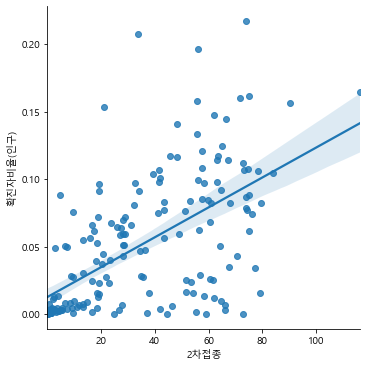

In [124]:
sns.lmplot(x='2차접종', y='확진자비율(인구)', data=df_corona_all_n)
plt.show()

### 인구당 확진자 발생 비율과 백신 접종률 상관관계 그래프 그려보기

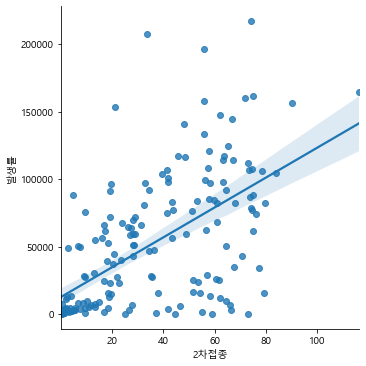

In [125]:
sns.lmplot(x='2차접종', y='발생률', data=df_corona_all_n)
plt.show()

In [126]:
df_corona_all_n.corr()['2차접종']['발생률']

0.5970275728730123

In [127]:
df_corona_all_n.corr()['2차접종']['확진자비율(인구)']

0.5970396083176327

### 01 현재까지의 누적된 데이터로 확인 결과 백신 2차 접종률과 인구당 확진자 비율은 양의 상관관계를 갖는다.
### 02 현재까지의 누적된 데이터로 확인 결과 백신 2차 접종률과 100만명당 발생률은 양의 상관관계를 갖는다.